#                                                                    Лабораторная работа №1

                                                                Датасет: Mushroom Classification

                                                                Авторы Сергей Данилов и Михаил Кривдин 

In [4]:
import sklearn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
import spacy

Для лабораторной работы был выбран датасет с классификацией грибов (https://www.kaggle.com/uciml/mushroom-classification) . Существует 20 признаков в датасете - цвет шляпки,жабры и так далее. Классов 2 - ядовитый или не ядовитый гриб. Все признаки категориальные:

In [5]:
csv_mushrooms = pd.read_csv('/content/drive/MyDrive/DataSets/mushrooms.csv')
csv_mushrooms.info()
csv_mushrooms.head(n=2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g


Примонтируйте гугл диск или вручную добавьте датасет по ссылке https://www.kaggle.com/uciml/mushroom-classification 

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Статистический анализ**

Выведе классы и категориальные признаки 

In [7]:
print(csv_mushrooms['class'].value_counts())
print(csv_mushrooms.astype('category'))
print(csv_mushrooms.dtypes)


e    4208
p    3916
Name: class, dtype: int64
     class cap-shape cap-surface  ... spore-print-color population habitat
0        p         x           s  ...                 k          s       u
1        e         x           s  ...                 n          n       g
2        e         b           s  ...                 n          n       m
3        p         x           y  ...                 k          s       u
4        e         x           s  ...                 n          a       g
...    ...       ...         ...  ...               ...        ...     ...
8119     e         k           s  ...                 b          c       l
8120     e         x           s  ...                 b          v       l
8121     e         f           s  ...                 b          c       l
8122     p         k           y  ...                 w          v       l
8123     e         x           s  ...                 o          c       l

[8124 rows x 23 columns]
class                       

**Информация о датасете:** https://www.kaggle.com/uciml/mushroom-classification

Признаки:

Шляпка (Cap) - форма поверхность цвет

Синяки Bruises

Запах Odor 

Жабры - gill - отростки, дистанция, размер, цвет.

Стебель - форма, корень, поверхность, цвет над и под кругам

Кольца на стебле - а количество кругов 0..2 целочисленный

Вуаль - тип и цвет

Кольца  - количество и тип

Цвет рисунка спор

Популяция

Место обитания

Все признаки категориальные признаки


Переведем буквенные метки в численные значения с помощью Label Encoder. Так распределение будет более нормированное.

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df_original = csv_mushrooms.copy(deep=True)
column_classes = {}
for column in df_original.columns:
    df_original[column] = labelencoder.fit_transform(df_original[column])
    column_classes[column] = labelencoder.classes_
df_original.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


Далее посмотрим на признаки и попробуем дополнительно обработать датасет. Колонка Population - явно кандидат на численный признак - 1(solitary)..6(abundand). *population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y*

Stalk root - Признак корневища. Видим, что у 30% пропущено (стоит знак вопроса)- что делать с пропусками?
1) Забить на признак (врядли, 30% же) 2) Самому придумать чем заполнить 3) новый тип. Я решил, что это же неизвестное значение "?" сделаю отдельным типом значения признака. 
 

In [9]:
#проверим аномалии
csv_mushrooms[csv_mushrooms['ring-number']=='n']['ring-type'].value_counts() # Должны быть только 36 n значения

n    36
Name: ring-type, dtype: int64

Проверим, нет ли аномалий. если колец нет - тип должен быть n. Видим что это соблюдается. Аномалии в датасете не найдены.





[4208, 3916]


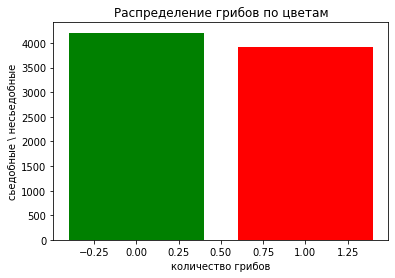

In [10]:
xaxis = list(df_original['class'].value_counts())
print(xaxis)
yaxis = [0,1]
fig, ax = plt.subplots()
ax.bar (yaxis, xaxis, color = ['green', 'red'])
ax.set_xlabel('количество грибов')
ax.set_ylabel('сьедобные \ несьедобные')
ax.set_title('Распределение грибов по цветам')
plt.show()

Сьедобных чуть больше чем не сьедобных, но примерно одинаковые значения.


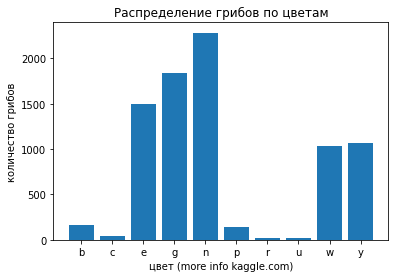

In [11]:
values = dict(df_original['cap-color'].value_counts())

colorRaspr = {}
for i in range(len(column_classes['cap-color'])):
  colorRaspr[column_classes['cap-color'][i]] = values[i]
fig, ax = plt.subplots()
ax.bar(list(colorRaspr.keys()), height=list(colorRaspr.values()))
ax.set_ylabel('количество грибов')
ax.set_xlabel('цвет (more info kaggle.com)')
ax.set_title('Распределение грибов по цветам')
plt.show()


2284 видов грибов имеют коричневую шляпку, на следующем месте серые шляпки и наконец красные. также примерно одинаково распределены желтые и белые шляпки. Отальные редко встречаются.

{4: 1264, 3: 1032, 8: 720, 2: 624, 9: 400, 5: 56, 0: 48, 1: 32, 7: 16, 6: 16}
{4: 1020, 2: 876, 3: 808, 9: 672, 8: 320, 0: 120, 5: 88, 1: 12}


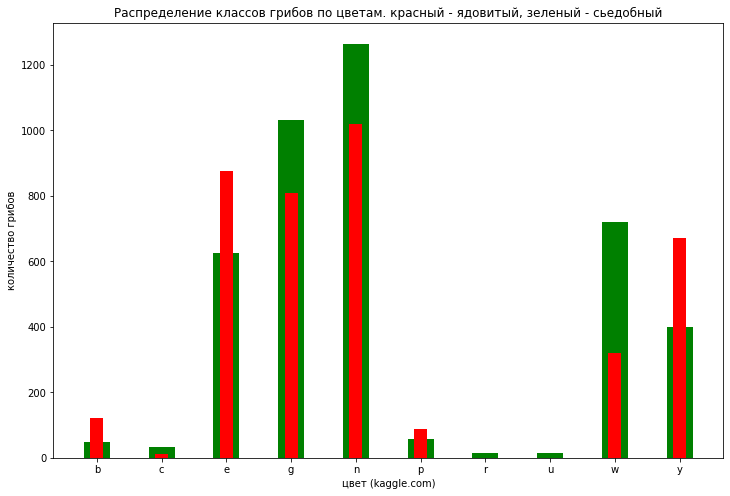

In [12]:
valuesEdable = dict(df_original[df_original['class']==0]['cap-color'].value_counts())
print(valuesEdable)
colorRasprEdable = {}
for i in range(len(column_classes['cap-color'])):
  colorRasprEdable[column_classes['cap-color'][i]] = valuesEdable[i]

valuesPoisonal = dict(df_original[df_original['class']==1]['cap-color'].value_counts())
print(valuesPoisonal)
colorRasprPoisonal = {}
for i in range(len(column_classes['cap-color'])):
  if (i==6 or i==7):
    colorRasprPoisonal[column_classes['cap-color'][i]] = 0
  else: 
    colorRasprPoisonal[column_classes['cap-color'][i]] = valuesPoisonal[i]



fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.4
b1 = ax.bar(list(colorRasprEdable.keys()), list(colorRasprEdable.values()),
            width=bar_width, color='green')
b2 = ax.bar(list(colorRasprPoisonal.keys()), list(colorRasprPoisonal.values()),
            width=bar_width/2, color='red')

ax.set_ylabel('количество грибов')
ax.set_xlabel('цвет (kaggle.com)')
ax.set_title('Распределение классов грибов по цветам. красный - ядовитый, зеленый - сьедобный')

plt.show()

У коричневых, серых и белых шляпок больше шанс, что они сьедобные. А вот красные и желтые грибы скорее ядовитые чем не ядовитые. То же самое с розовыми грибами и грибами цвета "буйволовой кожи".  

3) Где растет на ядовитость

4)Очень возможно что некоторые признаки просто можно слить в одну

 Матрица корреляции. Посмотрим какие еще можем обьединить\выкинуть признаки

                          Корреляционная матрица для признаков


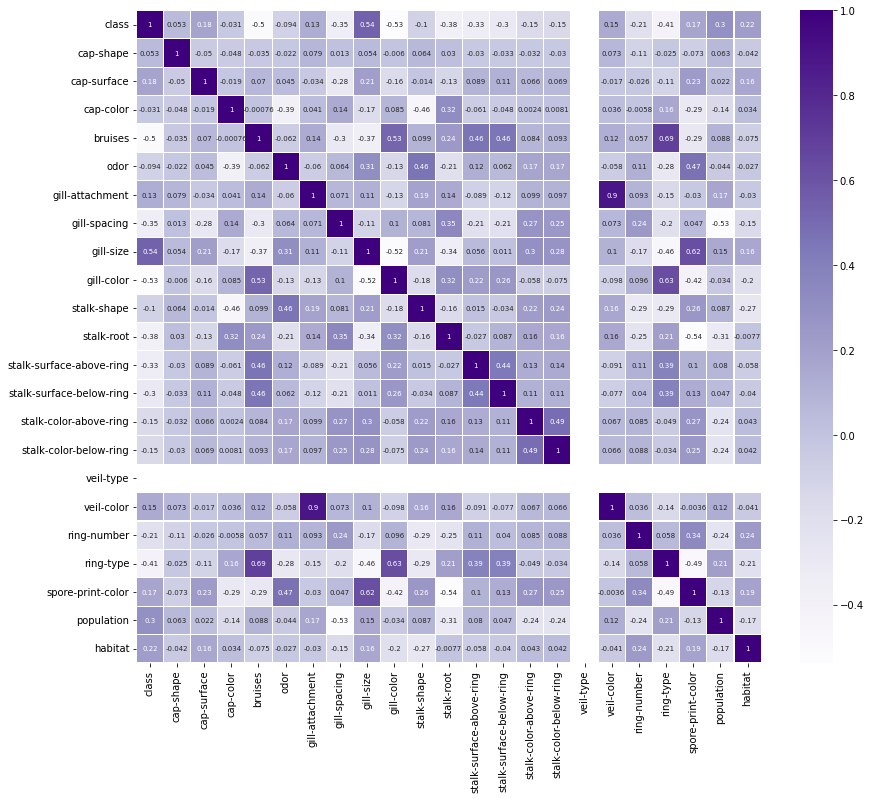

In [13]:
plt.figure(figsize=(14,12))
sns.heatmap(df_original.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
print('                          Корреляционная матрица для признаков')
#plt.savefig("corr.png", format='png', dpi=400, bbox_inches='tight')

То, что у признака veil-type пропущенны значения - следстиве того, что оно имеет в данном датасете только одно значение

In [14]:
df_original['veil-color'].value_counts()

2    7924
1      96
0      96
3       8
Name: veil-color, dtype: int64

Возможно в будущем мы можем выкинуть этот параметр, посомтрим в kNN обучении. Если выкинем параметр - упростим датасет

Еще можем заметить, что у типа вуали только одно значение, это поможет нам при дополнительной обработке датасета.

In [15]:
df_original['veil-type'].value_counts()

0    8124
Name: veil-type, dtype: int64

**Дополнительная обработка датасета:**

1) Ring-type и ring-number это явно связанные признаки. Так как типов всего 8, можем добавить к признаку число n*9 где n - число колец.

2) Так как мы увидели, что у вуали только один тип встречается, можем легко выбросить этот признак

3) Сделаем признак Population численным и связанным с частотой встречаемости:  abundant=a(6),clustered=c(4),numerous=n(5),scattered=s(3),several=v(2),solitary=y(1)

3) Видим, что отростки жабр гриба сильно коррелируют с цветом вуали, можем попробовать выбросить один из признаков, но в отдельном датасете, потому что это жесткая оптимизация.

In [16]:
#количество колец и тип связаны, обьединим их в один признак -> 0, 1a, 1b, 1c, 2a, 2b, 2c
df_optimized = df_original.copy(deep=True)
for i in range(df_optimized['ring-number'].count()):
  if (df_optimized['ring-number'][i] == 0):
    df_optimized['ring-type'][i] = 0
  else:
    df_optimized['ring-type'][i] = (df_optimized['ring-number'][i]-1)*9+(df_optimized['ring-type'][i]+1)
df_optimized = df_optimized.drop('ring-number', axis=1)
#выкидываем инфу о вуале гриба, все грибы в датасете с "частичной" вуалью 
df_optimized = df_optimized.drop('veil-type', axis=1)
#сделаем признак population численным
raspred = {'y':1, 'v':2, 's':3, 'n':5, 'c':4, 'a':6}
for i in range(csv_mushrooms['population'].count()):
    df_optimized['population'][i] = raspred[csv_mushrooms['population'][i]]
#Уберем коррелирующий с другим признак gill-attachment
df_optimized_high = df_optimized.drop('gill-attachment', axis=1)


                           Корреляционная матрица для признаков после оптимизации


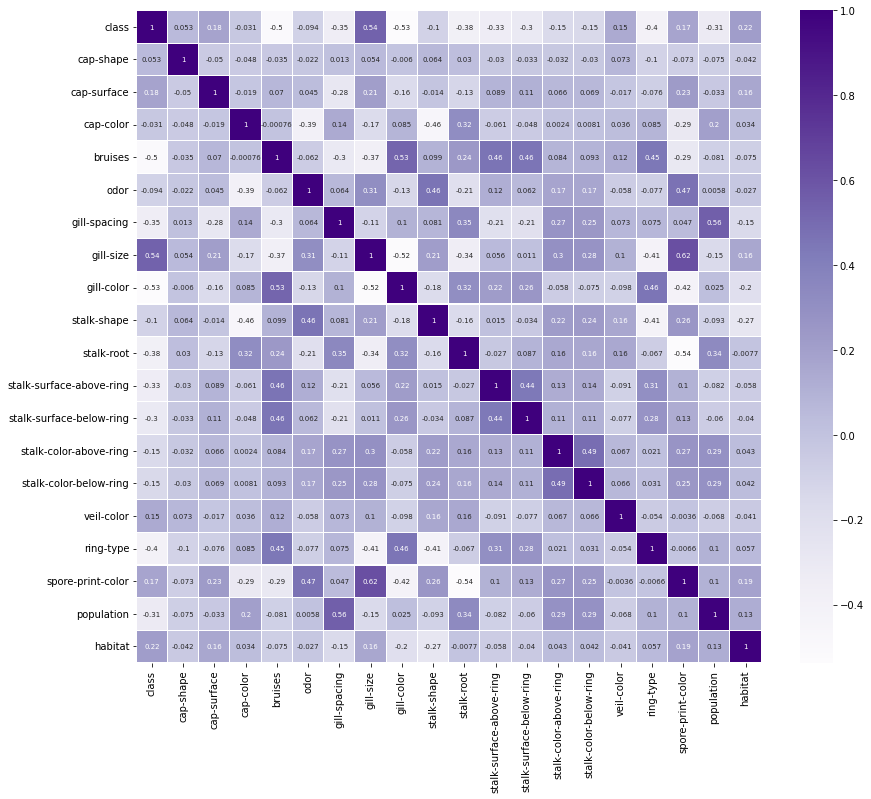

In [17]:
plt.figure(figsize=(14,12))
sns.heatmap(df_optimized_high.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
print('                           Корреляционная матрица для признаков после оптимизации')

**Классификация**

kNN метод и Naive Bayes - Danilov Sergey; 
Decision Tree and Random Forest - Krivdin Michail

**KNN:** 
Поделим датасет на обучающую и тестовую выборку


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import DistanceMetric
import random
def divide(df, percent_train=75): 
  df_y = df['class']
  df_x = df.drop('class', axis=1)
  x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size=percent_train/100, random_state=random.randint(0, 1000))
  y_train.head(n=5)
  return (x_train, x_test, y_train, y_test)

отобразим обьекты на плоскости с помощью алгоритма  PAC чтобы приблизительно понимать, как распределены классы и train\testing выборки

Здесь на графике снизу наложены выборка для обучения (оранжевая - ядовитые, синие - сьедобные) и для тестинга (красные - ядовитыеб зеленые - сьедобные). Видно, что единой структуры не наблюдается, но едва заметно "волнообразная структура" где поперек гребней располагаются сьедобные, а по длине гребня - ядовитые.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


    
 
      распределение грибов на плоскости


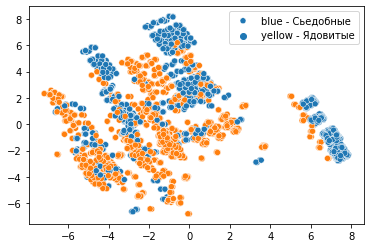

In [19]:
x_train, x_test, y_train, y_test = divide(df_original)
from sklearn.decomposition import PCA
pc = PCA(2, svd_solver='auto', random_state=random.randint(0,1000))

pca = pc.fit(x_train).transform(x_train)
x = [i[0] for i in pca]
y = [i[1] for i in pca]
#z = [i[2] for i in pca]
colors = []
for (i, _) in y_train.items():
  colors.append('p' if y_train[i]==1 else 'b')
sns.scatterplot(x, y, colors)
plt.legend(labels=["blue - Сьедобные","yellow - Ядовитые"])
print('    \n \n      распределение грибов на плоскости')

Данный график показывает распределение обьектов на плоскости. К плоскому отображению обьекты были приведены с помощью модели PAC. Видим, что ядовитые и не ядовитые грибы почти наполовину сгрупированны в одних локациях на плоскости, но четко определенного закона по графику мы не наблюдаем.

Попробуем настроить модель и потестить предсказание:

In [20]:
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
predicted = knn.predict(x_test)
print("точность классификации с метрикой Евклидовой: "+str(int(knn.score(x_test, y_test)*10000)/100)+"%")
print(classification_report(y_test, predicted))
print('ниже представлена матрица метрик:')

точность классификации с метрикой Евклидовой: 99.9%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1068
           1       1.00      1.00      1.00       963

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

ниже представлена матрица метрик:


Попробуем потюнить по параметру соседей. Построим график:

ниже представлена матрица метрик при оптимизации по гиперпараметрам:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1068
           1       1.00      1.00      1.00       963

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



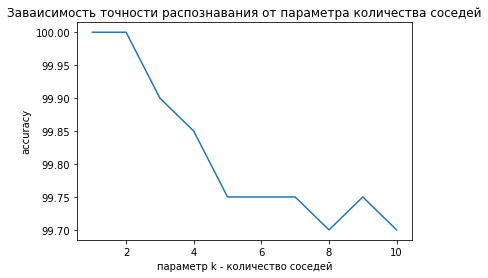

In [21]:
k_list = [i for i in  range(1,11)]
score_list = [0 for i in range(0,10)]
for i in range(1, 11):
  knn.set_params(n_neighbors=i)
  knn.fit(x_train, y_train)
  score_list[i-1] = int(knn.score(x_test, y_test)*10000)/100
fig, ax = plt.subplots()
ax.plot(k_list, score_list)
ax.set_ylabel('accuracy')
ax.set_xlabel('параметр k - количество соседей')
ax.set_title('Заваисимость точности распознавания от параметра количества соседей')
knn.set_params(n_neighbors=1)
knn.fit(x_train, y_train)
int(knn.score(x_test, y_test)*10000)/100
predicted = knn.predict(x_test)
print('ниже представлена матрица метрик при оптимизации по гиперпараметрам:')
print(classification_report(y_test, predicted))

Как ни странно, n_neigbors = 1 работает с точностью 100% хотя, по сути переобучение же должно быть. Теперь попробуем применить метрику, более заточенную под ктаегориальные признаки, метрику Хемминга:

In [22]:
knn.set_params(n_neighbors=1, metric='hamming')
knn.fit(x_train, y_train)

print("точность классификации с метрикой Хемминга: "+str(int(knn.score(x_test, y_test)*10000)/100)+"%")
predicted = knn.predict(x_test)
print(classification_report(y_test, predicted))

точность классификации с метрикой Хемминга: 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1068
           1       1.00      1.00      1.00       963

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



С этой метрикой точность 100%, что правда крайне подозрительно. Возможно, датасет простой, и такая точность оправдана. Попробуем еще на оптимизированном датасете попробовать прогнать даннй алгоритм.

точность классификации с метрикой Евклидовой и обработанным датасетом: 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1074
           1       1.00      1.00      1.00       957

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



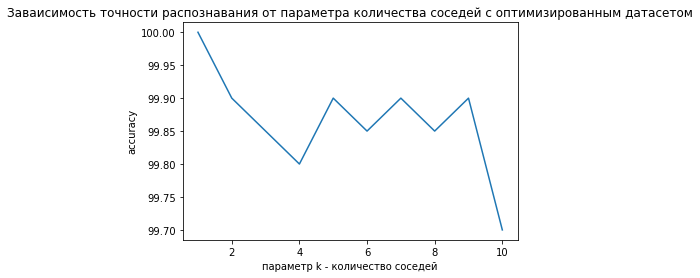

In [23]:
x_train, x_test, y_train, y_test = divide(df_optimized)
knn.set_params(n_neighbors=1, metric='euclidean')
knn.fit(x_train, y_train)
predicted = knn.predict(x_test)
print("точность классификации с метрикой Евклидовой и обработанным датасетом: "+str(int(knn.score(x_test, y_test)*10000)/100)+"%")
k_list = [i for i in  range(1,11)]
score_list = [0 for i in range(0,10)]
for i in range(1, 11):
  knn.set_params(n_neighbors=i)
  knn.fit(x_train, y_train)
  score_list[i-1] = int(knn.score(x_test, y_test)*10000)/100
fig, ax = plt.subplots()
ax.plot(k_list, score_list)
ax.set_ylabel('accuracy')
ax.set_xlabel('параметр k - количество соседей')
ax.set_title('Заваисимость точности распознавания от параметра количества соседей с оптимизированным датасетом')
knn.set_params(n_neighbors=1)
knn.fit(x_train, y_train)
int(knn.score(x_test, y_test)*10000)/100
predicted = knn.predict(x_test)
print(classification_report(y_test, predicted))

Еще посмотрим, как наша модель поведет при разбиении не 80%\20%, а например 70%\30%.

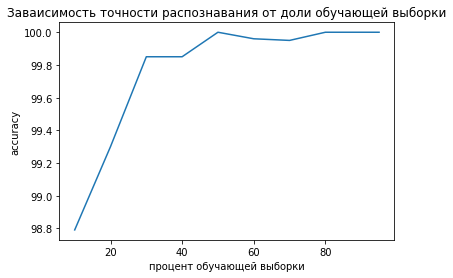

In [24]:
k_list = [i for i in  range(10, 91, 10)]
score_list = [0 for i in range(1,10)]
for i in range(1, 10):
  x_train, x_test, y_train, y_test = divide(df_optimized, percent_train=10*i)
  knn.fit(x_train, y_train)
  score_list[i-1] = int(knn.score(x_test, y_test)*10000)/100
x_train, x_test, y_train, y_test = divide(df_optimized, percent_train=95)
knn.fit(x_train, y_train)
score_list.append(int(knn.score(x_test, y_test)*10000)/100)
k_list.append(95)
fig, ax = plt.subplots()
ax.plot(k_list, score_list)
ax.set_ylabel('accuracy')
ax.set_xlabel('процент обучающей выборки')
ax.set_title('Заваисимость точности распознавания от доли обучающей выборки')
plt.show()


Также построим конфьюжн-матрицу, чтобы детально посмотреть на ошибки если они имеются.

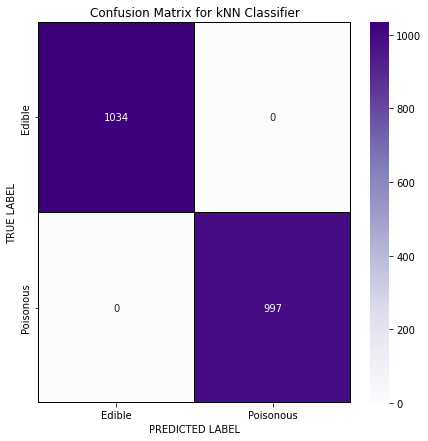

In [25]:
from sklearn.metrics import confusion_matrix 
x_train, x_test, y_train, y_test = divide(df_optimized, percent_train=75)
predicted=knn.predict(x_test)
cm = confusion_matrix( y_test, predicted)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for kNN Classifier')
plt.show()

**Naive Bayes**


Следующий алгоритм - Naive Bayes. Попробуем обучить модель и померить accuracy без тюнинга параметров.

In [26]:
from sklearn.naive_bayes import CategoricalNB
x_train, x_test, y_train, y_test = divide(df_optimized, percent_train=90)
clf = CategoricalNB()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)
print("точность классификации методом Naive Bayes без тюнинга: "+str(int(clf.score(x_test, y_test)*10000)/100)+"%")

точность классификации методом Naive Bayes без тюнинга: 95.69%


Попробуем настроить с разными процентами доли данных для обучения. Синий график - оригинальный датасет, красный - с дополнительной обработкой.

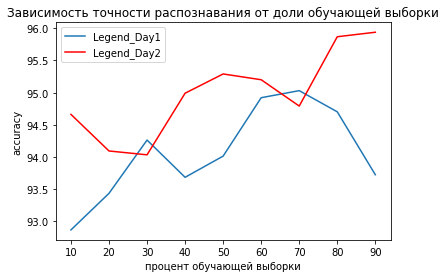

In [52]:
#работает не с первого раза, какая то проблема внутри score()
fig, ax = plt.subplots()

k_list = [i for i in  range(10, 91, 10)]
score_list = [0 for i in range(1,10)]
for i in range(1, 10):
  x_train, x_test, y_train, y_test = divide(df_optimized, percent_train=10*i)
  clf.fit(x_train, y_train)
  score_list[i-1] = int(clf.score(x_test, y_test)*10000)/100
ax.plot(k_list, score_list, label='a')

k_list = [i for i in  range(10, 91, 10)]
score_list = [0 for i in range(1,10)]
for i in range(1, 10):
  x_train, x_test, y_train, y_test = divide(df_optimized_high, percent_train=10*i)
  clf.fit(x_train, y_train)
  score_list[i-1] = int(clf.score(x_test, y_test)*10000)/100
ax.plot(k_list, score_list, color='r', label='a')
plt.legend(labels=["non-optimized","Optimized"])
ax.set_ylabel('accuracy')
ax.set_xlabel('процент обучающей выборки')
ax.set_title('Зависимость точности распознавания от доли обучающей выборки')
plt.show()

Получается, что оптимизированный датасет наоборот, ухудшает работу модели

По дефолтным настройкам Категориальный НБ имеет точность 96.43%. Попробуем потюнить? Например - ввести коэффициент сглаживания, который повысит точность и сложность функции ошибки.

In [ ]:
fig, ax = plt.subplots()

alpha_list = [i for i in range(1,100000,10)]
score_list = [0 for i in range(1,100000,10)]
x_train, x_test, y_train, y_test = divide(df_optimized, percent_train=70)
for i in range(len(alpha_list)):
  clf.set_params(alpha=1/alpha_list[i])
  clf.fit(x_train, y_train)
  score_list[i] = clf.score(x_test, y_test)
  alpha_list_divided = [1/alpha_list[i] for i in range(len(alpha_list)) ]
ax.plot(alpha_list_divided, score_list, color='r')
alpha_list = [i for i in range(1,100000,10)]
score_list = [0 for i in range(1,100000,10)]
x_train, x_test, y_train, y_test = divide(df_original, percent_train=70)
for i in range(len(alpha_list)):
  clf.set_params(alpha=1/alpha_list[i])
  clf.fit(x_train, y_train)
  score_list[i] = clf.score(x_test, y_test)
  alpha_list_divided = [1/alpha_list[i] for i in range(len(alpha_list)) ]
ax.plot(alpha_list_divided, score_list, color='b')
plt.legend(labels=["non-optimized","Optimized"])
ax.set_ylabel('accuracy')
ax.set_xlabel('коэффициент сглаживания C')
ax.set_title('Заваисимость точности распознавания от коэффициента сглаживания C')
plt.show()

In [55]:
clf.set_params(alpha=0, )
x_train, x_test, y_train, y_test = divide(df_original, percent_train=70)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)
predicted = clf.predict(x_test)
print('выведем отчет о точности нашей модели \n')
print(classification_report(y_test, predicted))
print("точность классификации методом Naive Bayes с оригинальным датасетом и с тюнингом: "+str(int(clf.score(x_test, y_test)*10000)/100)+"%\n\n")

выведем отчет о точности нашей модели 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1255
           1       0.99      1.00      1.00      1183

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

точность классификации методом Naive Bayes с оригинальным датасетом и с тюнингом: 99.71%




/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Уже лучше, получаем точность 99.80 % при минимальном коэффициенте сглаживания и оригинальном датасете. Видимо оптимизации играют роль в расчитывании вероятности, и дают меньшую точность при вычислении.

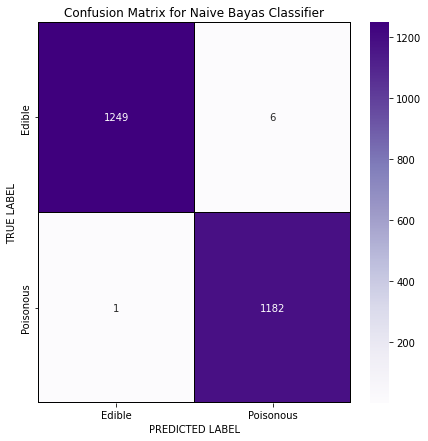

In [56]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix( y_test, predicted)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayas Classifier')
plt.show()

Получаем, что при обьеме тренировочной выборки 75% и коэффициенте сглаживания меньше 0.001 получаем точность модели 99.95% и одну - две ошибки 2-го рода (самая опасная ошибка). 

**Бустинг**

---



**CatBoost**

Я буду использовать билиотеку CatBoost, она подходит для категориальных признаков и с помощью ее проведу бустинг. Я буду использовать оригинальный датасет, так как CatBoost умеет хорошо предобрабатывать категориальные признаки.


In [ ]:
!pip install catboost
!pip install ipywidgets
!pip install shap
!jupyter nbextension enable --py widgetsnbextension


from catboost import CatBoostRegressor
from catboost import CatBoostClassifier

In [ ]:
from sklearn.model_selection import train_test_split
import random
def divide(df, percent_train=75): 
  df_y = df['class']
  df_x = df.drop('class', axis=1)
  x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size=percent_train/100, random_state=random.randint(0, 1000))
  y_train.head(n=5)
  return (x_train, x_test, y_train, y_test)

Поделим наш датасет на обучающую и валидационную выборки и обучим модель

In [ ]:
X_train, X_validation, y_train, y_validation = divide(csv_mushrooms)
cat_features = list(range(0, csv_mushrooms.drop('class', axis=1).shape[1]))
model = CatBoostClassifier()
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False
)

In [ ]:
predicted = model.predict(data=X_validation)
print("Точность распознавания для модели на методе CatBoost: "  + str(int((model.score(X_validation, y_validation)*10000)/100)) + "%")


Точность модели - 100%. Отобразим на всякий случай дерево чтобы проверить валидность решения, конфьюжн матрицу и отчет по метрикам.

In [ ]:
from catboost import Pool
X = csv_mushrooms.drop('class', axis=1)
y = csv_mushrooms['class']
pool = Pool(X, y, cat_features=cat_features, feature_names=list(X.columns))
model.plot_tree(0, pool = pool)

Получаем хорошо оптимизированное дерево, зависящее от запаха и размеров жабр. 

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
predicted = model.predict(X_validation)
cm = confusion_matrix( y_validation, predicted)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()

print(classification_report(y_validation, predicted))

Получаем, что CatBoost выдает крайне мощное предсказание со 100% точностью без дополнительного тюнинга.